# Advance Data Analysis in Python - Homework 3
### Shayan Rahimi Shahmirzadi - Student ID: 0080986

In [67]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings('ignore')

Reading cses4_cut.csv and splitting to train and test set using sklearn

In [68]:
df = pd.read_csv('cses4_cut.csv')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=97)

print(df.head())

   Unnamed: 0  D2002  D2003  D2004  D2005  D2006  D2007  D2008  D2009  D2010  \
0           0      1      4      4      2      2      9      9      9      1   
1           1      2      3      1      2      2      9      9      9      8   
2           2      2      2      1      2      2      9      9      9      7   
3           4      2      4      4      2      2      9      9      9      5   
4           5      1      6      4      1      1      9      9      9      1   

   ...  D2024  D2025  D2026  D2027  D2028  D2029  D2030  D2031  age  voted  
0  ...      9      9   8300    121      8    999    999      4   31   True  
1  ...      6      9   1101    121     12    999    999      4   42   True  
2  ...      5      9   1101    121      2    999    999      4   67   True  
3  ...      9      9   8300    121      2    999    999      4   26  False  
4  ...      1      9   1101    121      2    999    999      4   55   True  

[5 rows x 33 columns]


## Classifiers without reduction

cross_validation parameter is defined here in order to avoid repeat in cv=... in future code. Therefore, the code is DRY.

In [69]:
cross_validation = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

#### Logistic Regression

In [70]:
logistic_regression = LogisticRegression()
logistic_regression_accuracy = cross_val_score(logistic_regression, X, y, cv=cross_validation).mean()

#### Decision Tree

In [71]:
decision_tree = DecisionTreeClassifier()
decision_tree_accuracy = cross_val_score(decision_tree, X, y, cv=cross_validation).mean()

#### Support Vector Machine

In [72]:
support_vector_machine = SVC(probability=True)
support_vector_machine_accuracy = cross_val_score(support_vector_machine, X, y, cv=cross_validation).mean()

#### Linear Discriminant Analysis

In [73]:
linear_discriminant_analysis = LinearDiscriminantAnalysis()
linear_discriminant_analysis_accuracy = cross_val_score(linear_discriminant_analysis, X, y, cv=cross_validation).mean()

#### Quadratic Discriminant Analysis

In [74]:
quadratic_discriminant_analysis = QuadraticDiscriminantAnalysis()
quadratic_discriminant_analysis_accuracy = cross_val_score(quadratic_discriminant_analysis, X, y,
                                                           cv=cross_validation).mean()

#### Random Forest Classifier

In [75]:
random_forest = RandomForestClassifier()
random_forest_accuracy = cross_val_score(random_forest, X, y, cv=cross_validation).mean()

#### K-Nearest Neighbors

In [76]:
k_neighbors_classifier = KNeighborsClassifier()
k_neighbors_classifier_accuracy = cross_val_score(k_neighbors_classifier, X, y, cv=cross_validation).mean()

#### Naive Bayes

In [77]:
naive_bayes = GaussianNB()
naive_bayes_accuracy = cross_val_score(naive_bayes, X, y, cv=cross_validation).mean()

In [78]:
pd.options.display.float_format = '{:,.2f}%'.format
accuracies1 = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis',
              'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Accuracy': [100 * logistic_regression_accuracy, 100 * decision_tree_accuracy,
                 100 * support_vector_machine_accuracy, 100 * linear_discriminant_analysis_accuracy,
                 100 * quadratic_discriminant_analysis_accuracy, 100 * random_forest_accuracy,
                 100 * k_neighbors_classifier_accuracy, 100 * naive_bayes_accuracy],
}, columns=['Model', 'Accuracy'])

print(accuracies1.sort_values(by='Accuracy', ascending=False))

                             Model  Accuracy
5                    Random Forest    86.99%
3     Linear Discriminant Analysis    84.07%
0              Logistic Regression    83.08%
2           Support Vector Machine    82.75%
6              K-Nearest Neighbors    81.14%
1                    Decision Tree    78.43%
4  Quadratic Discriminant Analysis    69.94%
7                            Bayes    69.88%


## Feature selection and Dimensionality-reduction

Select features according to the k the highest scores. Here I choose the 12 highest features.


In [79]:
test = SelectKBest(score_func=chi2, k='all')
fit = test.fit(X, y)
k_scores = fit.scores_
X_after_feature_selection = test.fit_transform(X, y)

# Features in descending order by score
dicts = {}
dicts = dict(zip(df.columns, k_scores))
sort_dicts = sorted(dicts.items(), key=lambda x: x[1], reverse=True)

sort_dicts[:12]

[('Unnamed: 0', 2488485.0884104464),
 ('D2026', 137612.5250347248),
 ('D2027', 48651.854803746086),
 ('D2029', 41862.441438072274),
 ('D2021', 23616.010551455885),
 ('D2011', 18013.967469289142),
 ('D2030', 11274.361206204272),
 ('D2022', 9679.99694947531),
 ('D2028', 8300.820953075867),
 ('D2023', 7728.432886280269),
 ('D2015', 6210.004841830223),
 ('age', 4588.480589050823)]

new table after dimensionality-reduction which includes 12 features with the highest scores

In [80]:
X_after_feature_selection = df[
    ['D2011', 'D2015', 'D2016', 'D2021', 'D2022', 'D2023', 'D2026', 'D2027', 'D2028', 'D2029', 'D2030', 'age']]

print(X_after_feature_selection)

       D2011  D2015  D2016  D2021  D2022  D2023  D2026  D2027  D2028  D2029  \
0        422     99    999      3      0     99   8300    121      8    999   
1        999      1    931      5      3     99   1101    121     12    999   
2        818      8    999      3      0     99   1101    121      2    999   
3        513     99    999      7      2     99   8300    121      2    999   
4        235     99    999      2      0     99   1101    121      2    999   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
12446    999     12    999     99      0     99   1211    999     55      1   
12447    999     12    999     99      0     99   8300    999     17      1   
12448    999     99    999     99      2     99   1211    999     19      1   
12449    999     12    999     99      2     99   1210    999     25      1   
12450    999      7    999     99      0     99   1208    999     55      1   

       D2030  age  
0        999   31  
1        99

data distribution of new table

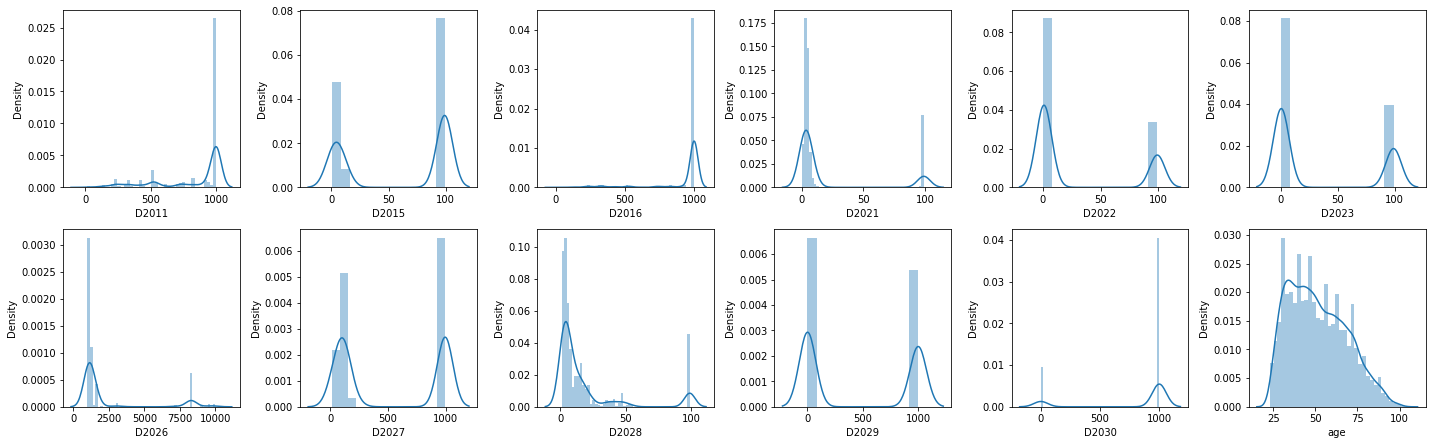

In [81]:
plt.figure(figsize=(20, 15))
plot_number = 1

for column in X_after_feature_selection:
    if plot_number <= 12:
        ax = plt.subplot(5, 6, plot_number)
        sns.distplot(X_after_feature_selection[column])
        plt.xlabel(column)

    plot_number += 1

plt.tight_layout()
plt.show()

Data distribution of new table is not Gaussian which is not suitable for the models. Therefore, I will make pre-processing and transform it in Gaussian form

In [82]:
quantile_transformer = preprocessing.QuantileTransformer(random_state=0)
X_new_trans = quantile_transformer.fit_transform(X_after_feature_selection)

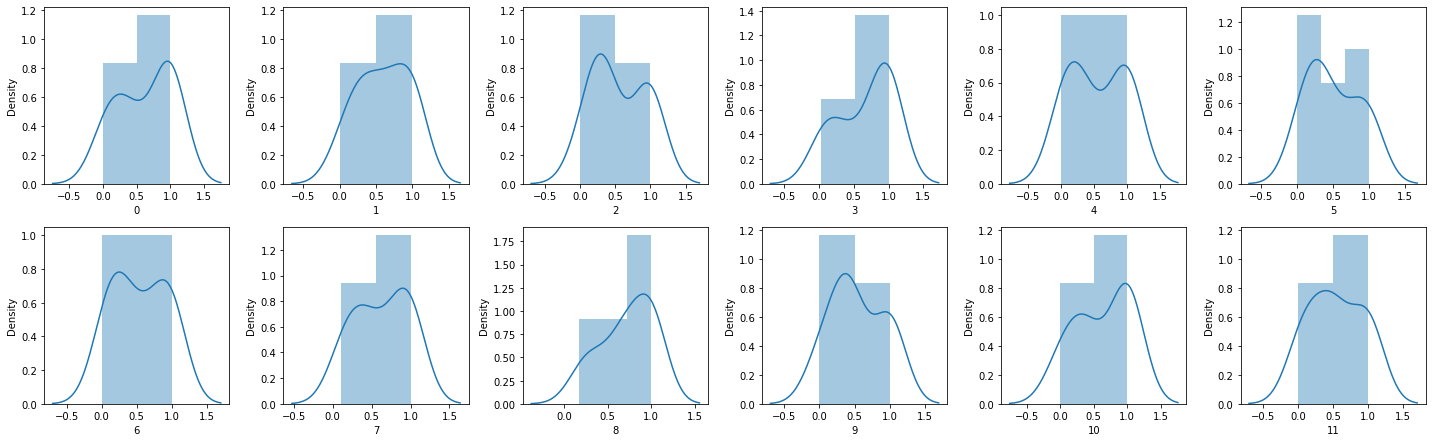

In [83]:
plt.figure(figsize=(20, 15))
plot_number = 1

for column in range(X_new_trans.shape[1]):
    if plot_number <= 30:
        ax = plt.subplot(5, 6, plot_number)
        sns.distplot(X_new_trans[column])
        plt.xlabel(column)

    plot_number += 1

plt.tight_layout()
plt.show()

## Classifiers with dimensionality-reduction and pre-processing

#### Logistic Regression

In [84]:
logistic_regression = LogisticRegression()
logistic_regression_accuracy = cross_val_score(logistic_regression, X, y, cv=cross_validation).mean()

#### Decision Tree

In [85]:
decision_tree = DecisionTreeClassifier()
decision_tree_accuracy = cross_val_score(decision_tree, X, y, cv=cross_validation).mean()

#### Support Vector Machine

In [86]:
support_vector_machine = SVC(probability=True)
support_vector_machine_accuracy = cross_val_score(support_vector_machine, X, y, cv=cross_validation).mean()

#### Linear Discriminant Analysis

In [87]:
linear_discriminant_analysis = LinearDiscriminantAnalysis()
linear_discriminant_analysis_accuracy = cross_val_score(linear_discriminant_analysis, X, y, cv=cross_validation).mean()

#### Quadratic Discriminant Analysis

In [88]:
quadratic_discriminant_analysis = QuadraticDiscriminantAnalysis()
quadratic_discriminant_analysis_accuracy = cross_val_score(quadratic_discriminant_analysis, X, y,
                                                           cv=cross_validation).mean()

#### Random Forest Classifier

In [89]:
random_forest = RandomForestClassifier()
random_forest_accuracy = cross_val_score(random_forest, X, y, cv=cross_validation).mean()

#### K-Nearest Neighbors

In [90]:
k_neighbors_classifier = KNeighborsClassifier()
k_neighbors_classifier_accuracy = cross_val_score(k_neighbors_classifier, X, y, cv=cross_validation).mean()

#### Naive Bayes

In [91]:
naive_bayes = GaussianNB()
naive_bayes_accuracy = cross_val_score(naive_bayes, X, y, cv=cross_validation).mean()

In [92]:
pd.options.display.float_format = '{:,.2f}%'.format
accuracies2 = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis',
              'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Accuracy': [100 * logistic_regression_accuracy, 100 * decision_tree_accuracy,
                 100 * support_vector_machine_accuracy, 100 * linear_discriminant_analysis_accuracy,
                 100 * quadratic_discriminant_analysis_accuracy, 100 * random_forest_accuracy,
                 100 * k_neighbors_classifier_accuracy, 100 * naive_bayes_accuracy],
}, columns=['Model', 'Accuracy'])

accuracies2.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
5,Random Forest,86.85%
3,Linear Discriminant Analysis,84.07%
0,Logistic Regression,83.08%
2,Support Vector Machine,82.75%
6,K-Nearest Neighbors,81.14%
1,Decision Tree,78.76%
4,Quadratic Discriminant Analysis,69.94%
7,Bayes,69.88%


## Hyper parameter Tuning
At first, I tried grid search method. However, since the result is not as good, I continued with for loops.

## Grid search

In [93]:
seed = 42
grid = {"C": np.logspace(-3, 3, 7)
    , "penalty": ["l1", "l2"]
    , "verbose": [1, 5, 10]}  # l1 lasso l2 ridge

log_reg = LogisticRegression()
log_reg_cv = GridSearchCV(log_reg, grid, cv=10)  ## n_jobs=10 parallel processing
log_reg_cv.fit(X_train, y_train)
best_parameters = log_reg_cv.best_params_

clf = LogisticRegression(C=log_reg_cv.best_params_['C']
                         , penalty=log_reg_cv.best_params_['penalty']
                         , random_state=42).fit(X, y)

# Setting regularization parameter: The alpha parameter controls the degree of sparsity of the estimated coefficients

pred = clf.predict(X_test)
clf.predict_proba(X_test)
clf.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

0.8265756724207146

## Tuning with for loop

#### Random Forest Classifier

In [94]:
best_score = 0
n_estimators = [100, 200, 500, 1000]
criterions = ['gini', 'entropy']
for i in n_estimators:
    for k in criterions:
        random_forest = RandomForestClassifier(n_estimators=i, criterion=k)
        random_forest_accuracy = cross_val_score(random_forest, X_new_trans, y, cv=cross_validation).mean()
        if random_forest_accuracy > best_score:
            best_score = random_forest_accuracy
            best_est = i
            best_cri = k
random_forest_accuracy = best_score
print("Best score is:", best_score, "with estimator:", best_est, "criterion:", best_cri)

Best score is: 0.8625451625853071 with estimator: 500 criterion: entropy


#### Linear Discriminant Analysis

In [95]:
best_score = 0
solver = ['svd', 'lsqr', 'eigen']
for i in solver:
    linear_discriminant_analysis = LinearDiscriminantAnalysis(solver=i)
    linear_discriminant_analysis_accuracy = cross_val_score(linear_discriminant_analysis, X_new_trans, y,
                                                            cv=cross_validation).mean()
    if linear_discriminant_analysis_accuracy > best_score:
        best_score = linear_discriminant_analysis_accuracy
        best_solver = i
linear_discriminant_analysis_accuracy = best_score
print("Best score is:", best_score, "with solver:", best_solver)

Best score is: 0.8381372942593336 with solver: svd


#### Logistic Regression

In [96]:
best_score = 0
penalty = ['l1', 'l2', 'elasticnet', 'none']
for i in penalty:
    logistic_regression = LogisticRegression(penalty=i)
    logistic_regression_accuracy = cross_val_score(logistic_regression, X_new_trans, y, cv=cross_validation).mean()
    if logistic_regression_accuracy > best_score:
        best_score = logistic_regression_accuracy
        best_p = i
logistic_regression_accuracy = best_score
print("Best score is:", best_score, "with penalty", best_p)

Best score is: 0.8389401846647931 with penalty none


#### K-Nearest Neighbors

In [97]:
best_score = 0
for i in range(2, 10):
    k_neighbors_classifier = KNeighborsClassifier(n_neighbors=i)
    k_neighbors_classifier_accuracy = cross_val_score(k_neighbors_classifier, X_new_trans, y,
                                                      cv=cross_validation).mean()
    if k_neighbors_classifier_accuracy > best_score:
        best_score = k_neighbors_classifier_accuracy
        best_n = i
k_neighbors_classifier_accuracy = best_score
print("Best score is:", best_score, "with number of neighbors:", best_n)

Best score is: 0.844399839421919 with number of neighbors: 9


#### Support Vector Machine

In [98]:
best_score = 0
clist = [0.1, 1, 2, 5]
kernel = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed2']
for i in clist:
    for k in kernel:
        support_vector_machine = SVC(C=i, kernel=k)
        support_vector_machine_accuracy = cross_val_score(support_vector_machine, X_new_trans, y,
                                                          cv=cross_validation).mean()
        if support_vector_machine_accuracy > best_score:
            best_score = support_vector_machine_accuracy
            best_c = i
            best_k = k
support_vector_machine_accuracy = best_score
print("Best score is:", best_score, "with c:", best_c, "kernel:", k)

Best score is: 0.8594941790445605 with c: 5 kernel: precomputed2


In [99]:
pd.options.display.float_format = '{:,.2f}%'.format
accuracies3 = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Random Forest',
              'K-Nearest Neighbors', ],
    'Accuracy': [100 * logistic_regression_accuracy, 100 * support_vector_machine_accuracy,
                 100 * linear_discriminant_analysis_accuracy, 100 * random_forest_accuracy,
                 100 * k_neighbors_classifier_accuracy],
}, columns=['Model', 'Accuracy'])

accuracies3.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
3,Random Forest,86.25%
1,Support Vector Machine,85.95%
4,K-Nearest Neighbors,84.44%
0,Logistic Regression,83.89%
2,Linear Discriminant Analysis,83.81%


# FINAL RESULTS

In [100]:
print("Classifiers without reduction:")
print(accuracies1.sort_values(by='Accuracy', ascending=False))
print("Classifiers with dimensionality-reduction and pre-processing:")
print(accuracies2.sort_values(by='Accuracy', ascending=False))
print("After optimizing the model and its hyper parameters:")
print(accuracies3.sort_values(by='Accuracy', ascending=False))

Classifiers without reduction:
                             Model  Accuracy
5                    Random Forest    86.99%
3     Linear Discriminant Analysis    84.07%
0              Logistic Regression    83.08%
2           Support Vector Machine    82.75%
6              K-Nearest Neighbors    81.14%
1                    Decision Tree    78.43%
4  Quadratic Discriminant Analysis    69.94%
7                            Bayes    69.88%
Classifiers with dimensionality-reduction and pre-processing:
                             Model  Accuracy
5                    Random Forest    86.85%
3     Linear Discriminant Analysis    84.07%
0              Logistic Regression    83.08%
2           Support Vector Machine    82.75%
6              K-Nearest Neighbors    81.14%
1                    Decision Tree    78.76%
4  Quadratic Discriminant Analysis    69.94%
7                            Bayes    69.88%
After optimizing the model and its hyper parameters:
                          Model  Accuracy
3 